<a href="https://colab.research.google.com/github/htapiagroup/manipulacion-de-datos-con-pandas-EisaacJC/blob/master/notebooks/01.07-Fancy-Indexing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img align="left" style="padding-right:10px;" src="https://www.uv.mx/ffia/files/2012/09/playerLogo2.jpg">

El contenido ha sido adaptado para el curso de Introducción a la ciencia de Datos,
por HTM y GED a partir del libro [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) 
de Jake VanderPlas y se mantiene la licencia sobre el texto, 
[CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), 
y sobre el codigo [MIT license](https://opensource.org/licenses/MIT).*MIT).*

<!--NAVIGATION-->
< [Comparaciones, máscaras y lógica booleana](01.06-Boolean-Arrays-and-Masks.ipynb) | [Contenido](Index.ipynb) | [Ordenando elementos de un arreglo](01.08-Sorting.ipynb) >




# Indexado elegante

[texto del enlace](https:// [texto del enlace](https://))## Explorando indexados elegantes


In [1]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [2]:
[x[3], x[7], x[2]]

[71, 86, 14]

In [3]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

In [4]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [5]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [6]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

In [7]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [8]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

## Indexado combinado

In [9]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [10]:
X[2, [2, 0, 1]]

array([10,  8,  9])

In [11]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [12]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

## Ejemplo: Selección de puntos aleatorios


In [13]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

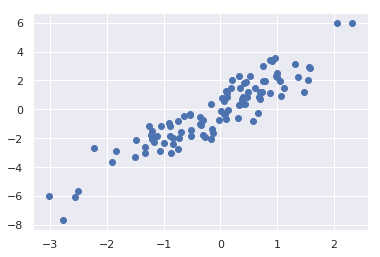

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling

plt.scatter(X[:, 0], X[:, 1]);

In [15]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([62, 90, 23,  4, 40, 91, 42, 61,  9, 38, 47, 52, 20, 84, 55, 12, 95,
       34, 19, 99])

In [16]:
selection = X[indices]  # fancy indexing here
selection.shape

(20, 2)

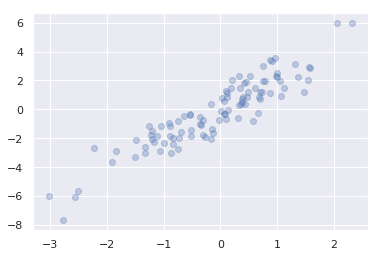

In [17]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='none', s=200);

## Modificando valores con indexado elegante


In [18]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [19]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [20]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [21]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [22]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


## Ejemplo: Separando datos en compartimentos (bins)


In [0]:
np.random.seed(42)
x = np.random.randn(100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

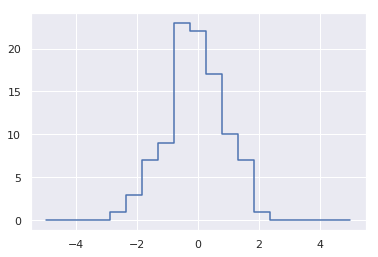

In [24]:
# plot the results
plt.plot(bins, counts, linestyle='steps');


```python
plt.hist(x, bins, histtype='step');
```


In [25]:
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
The slowest run took 127.58 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 19 µs per loop
Custom routine:
The slowest run took 4.08 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 13.2 µs per loop


In [26]:
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
10 loops, best of 3: 82.4 ms per loop
Custom routine:
10 loops, best of 3: 117 ms per loop


<!--NAVIGATION-->
< [Comparaciones, máscaras y lógica booleana](01.06-Boolean-Arrays-and-Masks.ipynb) | [Contenido](Index.ipynb) | [Ordenando elementos de un arreglo](01.08-Sorting.ipynb) >

